<a href="https://colab.research.google.com/github/nnh92/Kmeans-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(297, 2)


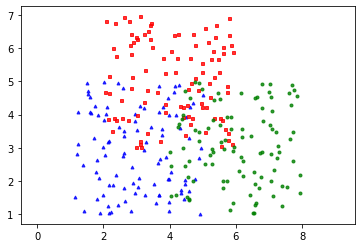

ok
ok


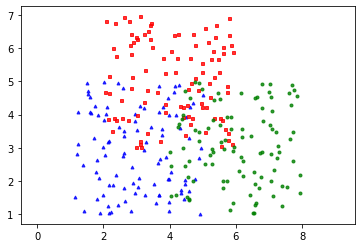

In [8]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

dtA = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-A.csv').values
dtB = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-B.csv').values
dtC = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-C.csv').values

X = np.concatenate((dtA,dtB,dtC), axis =0)
K = 3

original_label = np.asarray([0]*len(dtA) + [1]*len(dtB) + [2]*len(dtC)).T
#print(original_label)
print(X.shape)
#print(dtA)

def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label==0,:]
  X1 = X[label==1,:]
  X2 = X[label==2,:]
  plt.plot(dtA[:,0],dtA[:,1],'b^',markersize = 3, alpha = .8)
  plt.plot(dtB[:,0],dtB[:,1],'rs',markersize = 3, alpha = .8)
  plt.plot(dtC[:,0],dtC[:,1],'go',markersize = 3, alpha = .8)

  plt.axis('equal')
  plt.plot()
  plt.show()


#print(dtA)
#print(X)

kmeans_display(X,original_label)

def kmeans_int_centers(X,k):
  return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_label(X,centers):
  D = cdist(X,centers)
  return np.argmin(D, axis = 1)

#print(X.shape[0])
#int_centers = kmeans_int_centers(X,3)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    Xk = X[labels == k,:]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

#print(X.shape[0])

def kmeans_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
  centers = [kmeans_int_centers(X, K)]
  i = 0
  labels = []
  while True:
    labels.append(kmeans_assign_label(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1],K)
    if kmeans_converged(centers[-1],new_centers):
      #print('check ok')
      break
    centers.append(new_centers)
    i += 1
  return (centers , labels, i)

kmeans(X, K)

(centers, labels, i) = kmeans(X, K)
kmeans_display(X, labels[-1])



#print([kmeans_int_centers(X,3)])
